In [251]:
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import spatial

%matplotlib inline

try:
    code_dir
except NameError:
    code_dir = os.getcwd()
    base_dir = code_dir.replace("/codes_local", "")
    salmon_dir = base_dir + "/0_salmon"
    deseq2_dir1 = base_dir + "/1_DEseq2"
    deseq2_dir2 = base_dir + "/1_DEseq2_merge_shChd7"
    deseq2_compile_dir = base_dir + "/1_DEseq2_compiled"
base_dir

'/media/pipkin/ROCKET-PRO/CD8_DEV_SC/5_Chd7_shRNA_RNA'

### 0. Preprocessing

In [279]:
tpm_file = base_dir + '/1_DEseq2_compiled/gene_tpm_bysample.csv'
tpm_df = pd.read_csv(tpm_file, index_col=0)


if False:
    ###----- Define highly expressed & variable genes
    pval_file = base_dir + '/1_DEseq2_compiled/sep_Chd7_shRNAs/DESeq2_pvalue.csv'
    pval_df = pd.read_csv(pval_file, index_col=0)

    fc_file = base_dir + '/1_DEseq2_compiled/sep_Chd7_shRNAs/DESeq2_log2FoldChange.csv'
    fc_df = pd.read_csv(fc_file, index_col=0)

    pval_min = pval_df.min(axis=1)
    pval_slt_df = pval_df[pval_min < 0.05]

    fc_abs_max = fc_df.abs().max(axis=1)
    fc_slt_df = fc_df[fc_abs_max > 0.5]

    hv_genes = set(fc_slt_df.index) & set(pval_slt_df.index)

    ###--- Select highly variable genes
    tpm_hv_df = tpm_df.loc[hv_genes]
    tpm_hv_he_df = tpm_hv_df[tpm_hv_df.max(axis=1) > 5]
    print(tpm_hv_he_df.shape)

    ###--- Convert to z score
    tpm_hv_he_df_z = tpm_hv_he_df.transpose().apply(zscore).transpose()
    tpm_hv_he_df_z.head()

In [306]:
tpm_he_df = tpm_df[tpm_df.max(axis=1) > 50]
tpm_he_df.shape

(3820, 9)

In [308]:
tpm_he_z_df = tpm_he_df.transpose().apply(zscore).transpose()
tpm_he_z_df_maxz = tpm_he_z_df.abs().max(axis=1)
tpm_he_z_hv_df = tpm_he_z_df[tpm_he_z_df_maxz > 1.5]
tpm_he_hv_df = tpm_he_df[tpm_he_z_df_maxz > 1.5]

In [309]:
tpm_z_he_hv_df.T

gene_name,0610010K14Rik,1110004F10Rik,1110008P14Rik,1500009L16Rik,1600014C10Rik,1810009A15Rik,1810013L24Rik,1810022K09Rik,1810037I17Rik,1810058I24Rik,...,mt-Co1,mt-Co2,mt-Co3,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd3,mt-Nd4,mt-Nd4l,mt-Nd5
Cd4_1_1,-0.952074,0.354226,-0.595548,2.102593,-1.969315,0.213996,-0.706895,0.271556,0.219917,-0.444123,...,0.217622,0.507511,1.892809,0.620407,0.704995,0.095949,-1.526801,-0.048081,-0.647385,0.562611
Chd7_1_1,1.658488,-0.604876,-0.237466,-0.370166,-0.082154,-0.479736,-0.833906,-1.071514,0.935631,-1.723594,...,-1.315625,-1.503860,-0.268967,-0.672620,-1.020419,-0.460943,-0.802184,-0.483295,-0.072574,0.031371
Chd7_2_1,-1.184401,-0.755655,-1.428559,0.653617,-0.335621,0.905850,-1.211412,-0.628195,0.790383,0.140428,...,0.315104,1.958058,0.088909,0.527409,0.517485,2.111093,0.374519,0.160453,1.204044,1.439969
Chd7_3_1,0.574786,0.113698,0.375697,-0.159963,-0.543024,1.809994,-0.857127,-1.540490,1.268356,-0.498830,...,-0.723819,-0.533348,-0.460168,-0.611828,-0.637483,-0.362963,1.488067,-0.915765,-1.117392,0.503139
Cd4_1_2,1.250916,-1.160493,1.931176,0.545887,1.370982,0.985852,0.371968,-0.605380,-1.302475,1.914439,...,-1.327284,-1.154112,-1.428594,-1.454725,-1.548417,-1.406391,-0.683086,-1.767035,-0.419662,-2.167087
Chd7_1_2,-1.223024,0.674941,1.395149,-0.626923,0.984721,-1.211680,1.261228,1.815015,0.814806,0.069601,...,1.303105,-0.440543,-1.044131,1.393682,1.081060,0.448592,-0.461809,1.136196,-1.438767,0.695883
Chd7_2_2,-0.071003,-0.062538,-0.631301,0.148258,1.045065,-0.456107,-0.586353,0.367019,-0.531728,-0.827069,...,0.403445,-0.054830,1.177150,-0.397220,-0.277422,-0.633155,0.812576,-0.271149,0.062804,-0.903033
Chd7_3_2,0.494081,-0.873501,-0.455661,-1.715268,0.337099,-1.340209,0.930071,0.345214,-1.726310,0.315669,...,-0.518046,0.401090,-0.529673,-0.950926,-0.516214,-0.787220,-0.603546,0.380995,0.632499,-0.497707
Cd19_1_1,-0.547771,2.314197,-0.353487,-0.578036,-0.807753,-0.427960,1.632426,1.046775,-0.468580,1.053478,...,1.645497,0.820034,0.572664,1.545821,1.696416,0.995037,1.402265,1.807681,1.796433,0.334854


### 1. PCA

In [310]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(tpm_he_hv_df.T)

In [318]:
pca = PCA(n_components=4)
pca.fit(tpm_he_hv_df)

print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[9.79492657e-01 1.65821338e-02 2.25702246e-03 8.48555123e-04]


0.9991803681506415

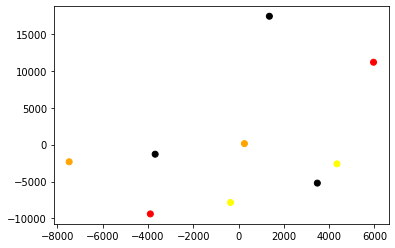

In [312]:
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=colors)

In [313]:
pca_out_df = pd.DataFrame(pca.components_.T)
pca_out_df['types'] = meta_df['Cond'].tolist()
colors = ["black", "red", "orange", "yellow", "black", "red", "orange", "yellow", "black"]

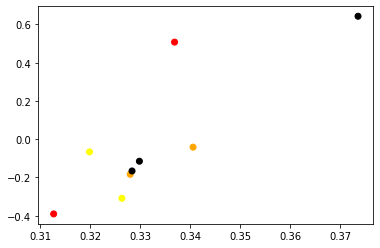

In [314]:
plt.scatter(pca_out_df[0], pca_out_df[1], c=colors)

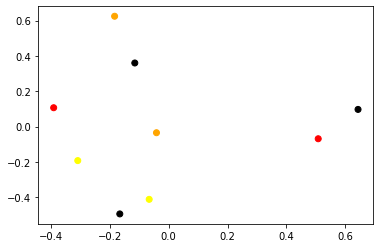

In [315]:
plt.scatter(pca_out_df[1], pca_out_df[2], c=colors)

### 2. Sample similarity

In [316]:
sp_order = ['Cd4_1_1', 'Cd4_1_2', 'Cd19_1_1',  
            'Chd7_1_1',  'Chd7_1_2',  'Chd7_2_1','Chd7_2_2','Chd7_3_1','Chd7_3_2']

dist_df = pd.DataFrame({"sample": sp_order}).set_index("sample")
for i in sp_order:
    i_col = []
    for j in sp_order:
        i_col.append(spatial.distance.cosine(tpm_hv_he_df_z[i], tpm_hv_he_df_z[j]))
    dist_df[i] = i_col

<AxesSubplot:ylabel='sample'>

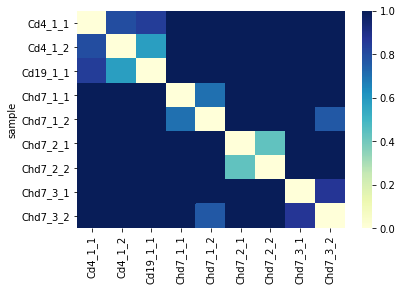

In [317]:
sns.heatmap(dist_df, cmap="YlGnBu", vmin=0, vmax=1)